In [ ]:
!pip install radis

In [2]:
import matplotlib.pyplot as plt
from radis import plot_diff, SpectrumFactory, get_residual
from publib import set_style, fix_style
import numpy as np


In [5]:
SAVE=True  # save figs
# Computation parameters
wmin = 2000
wmax = 10000
dv = 0.01
T = 3000.0 #K
p = 0.1 #bar
broadening_max_width=10    # slineshape broadening width, ext



In [6]:
#%% Calculate reference
sf = SpectrumFactory(wavenum_min=wmin, wavenum_max=wmax, 
                  pressure=p,
                  wstep=dv,
                  broadening_max_width=broadening_max_width, 
                  molecule="OH",
                  cutoff=0, # 1e-27,
                  verbose=2,
                  )


In [ ]:
# Fetching data from HITEMP Database and loading in spectrum factory
sf.fetch_databank('hitemp',load_energies=False)


In [11]:
#  Defining variabes to store spectrum
spectra_default = {}
spectra_DLM = {}
spectra_DLM_opt = {}

Nlines_target = [1e2, 1e3, 1e4, 1e5]  # Number of lines in the dataframe df0
Nlines = []


In [9]:
# Finds complement of the lines to drop
def find_missing(lst, N):
    start = 0
    end = N-1
    return sorted(set(range(start, end + 1)).difference(lst))

In [12]:
for Ntarget in Nlines_target:
    
    # Load HITEMP database for this species/range (433984 rows)
    sf.load_databank('HITEMP-OH',load_energies=False)
    # Reduce number of lines to approximately Nlines:

    rows = np.arange(0,len(sf.df0),max(1,int(len(sf.df0)//Ntarget)))
    rows = find_missing(rows,len(sf.df0))
    rows = sf.df0.index[rows]
    sf.df0.drop(rows, inplace=True)
    #sf.df0 = sf.df0.sample(frac = 0.4)
    #sf.df0 = sf.df0[::max(1,int(len(sf.df0)//Ntarget))]
    N = len(sf.df0)
    Nlines.append(N)
    
    #%% Calculate normal

    sf.params['optimization'] = None
    sf.params['broadening_method'] = 'voigt'
    sf.misc['chunksize'] = 1e7
    s_none = sf.eq_spectrum(300)
    s_none.name = 'Default ({0:.1f}s)'.format(s_none.conditions['calculation_time'])
    spectra_default[N] = s_none

    # %% Calculate DLM
    
    sf.params['optimization'] = "simple"
    sf.params['broadening_method'] = 'fft'
    s_dlm = sf.eq_spectrum(T)
    s_dlm.name = 'New method {0}'.format(s_dlm.conditions['calculation_time'])
    spectra_DLM[N] = s_dlm

    # %% Calculate DLM (optimized)
    
    sf.params['optimization'] = "min-RMS"
    sf.params['broadening_method'] = 'fft'
    s_dlm_opt = sf.eq_spectrum(T)
    s_dlm_opt.name = 'DLM ({0:.1f}s)'.format(s_dlm_opt.conditions['calculation_time'])
    spectra_DLM_opt[N] = s_dlm_opt


Using database: HITEMP-OH
'HITEMP-OH':
{'info': 'HITEMP OH lines (0.0-43408.8 cm-1) with TIPS-2017 (through HAPI) for partition functions', 'path': ['/root/.radisdb/OH-13_HITEMP2020.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/13_HITEMP2020.par.bz2', 'download_date': '09 Apr 2021', 'wavenumber_min': '0.002967', 'wavenumber_max': '43408.75294'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.00s
Loaded databank in 0.2s (20,262 lines)
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state      

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Calculated other spectral quantities in 0.12s
Spectrum calculated in 0.29s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 0.33s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath               /root/.radisdb/OH-13_HITEMP2020.h5
   

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 17.26s
Calculated other spectral quantities in 0.10s
Spectrum calculated in 17.39s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 17.42s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath              

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 17.24s
Calculated other spectral quantities in 0.10s
Spectrum calculated in 17.36s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 17.40s
Using database: HITEMP-OH
'HITEMP-OH':
{'info': 'HITEMP OH lines (0.0-43408.8 cm-1) with TIPS-2017 (through HAPI) for partition functions', 'path': ['/root/.radisdb/OH-13_HITEMP2020.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/13_HITEMP2020.par.bz2', 'download_date': '09 Apr 2021', 'wavenumber_min': '0.002967', 'wavenumber_max': '43408.75294'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.00s
Loaded databank in 0.2s (20,262 lines)
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope     

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


(1s)	100.0%	
Calculated line broadening in 0.91s
Calculated other spectral quantities in 0.10s
Spectrum calculated in 1.06s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 1.10s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath    

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.93s
Calculated other spectral quantities in 0.10s
Spectrum calculated in 17.09s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 17.12s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath              

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.47s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 16.62s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 16.66s
Using database: HITEMP-OH
'HITEMP-OH':
{'info': 'HITEMP OH lines (0.0-43408.8 cm-1) with TIPS-2017 (through HAPI) for partition functions', 'path': ['/root/.radisdb/OH-13_HITEMP2020.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/13_HITEMP2020.par.bz2', 'download_date': '09 Apr 2021', 'wavenumber_min': '0.002967', 'wavenumber_max': '43408.75294'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.00s
Loaded databank in 0.2s (20,262 lines)
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope     

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


(11s)	100.0%	
Calculated line broadening in 11.23s
Calculated other spectral quantities in 0.13s
Spectrum calculated in 11.48s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 11.52s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.60s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 16.77s (before object generation)
Generated Spectrum object in 0.05s
Spectrum calculated in 16.82s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath              

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.37s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 16.54s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 16.58s
Using database: HITEMP-OH
'HITEMP-OH':
{'info': 'HITEMP OH lines (0.0-43408.8 cm-1) with TIPS-2017 (through HAPI) for partition functions', 'path': ['/root/.radisdb/OH-13_HITEMP2020.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/13_HITEMP2020.par.bz2', 'download_date': '09 Apr 2021', 'wavenumber_min': '0.002967', 'wavenumber_max': '43408.75294'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.00s
Loaded databank in 0.2s (20,262 lines)
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope     

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


(23s)	100.0%	
Calculated line broadening in 22.87s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 23.09s (before object generation)
Generated Spectrum object in 0.05s
Spectrum calculated in 23.14s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.25s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 16.47s (before object generation)
Generated Spectrum object in 0.04s
Spectrum calculated in 16.51s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath              

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.019 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0063 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.27s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 16.47s (before object generation)
Generated Spectrum object in 0.05s
Spectrum calculated in 16.52s


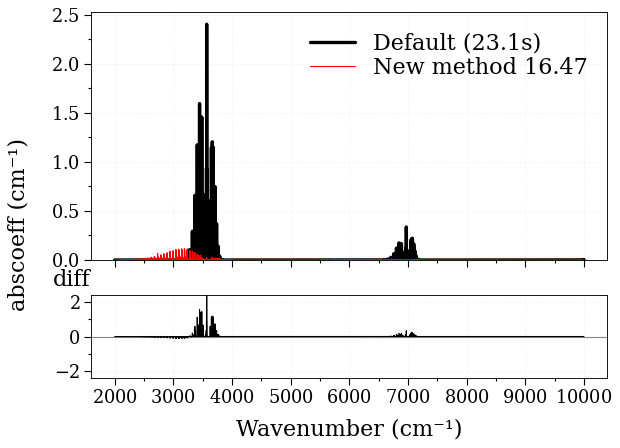

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9da51f32d0>])

In [13]:
plot_diff(spectra_default[N], spectra_DLM[N], 'abscoeff')

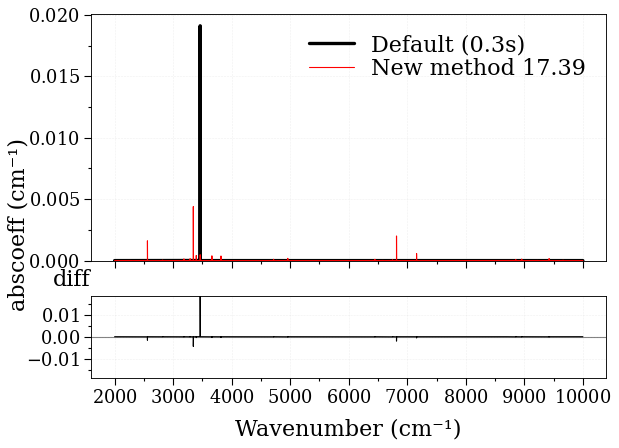

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9da196fad0>])

In [19]:
plot_diff(spectra_default[Nlines[0]], spectra_DLM[Nlines[0]], 'abscoeff')

In [20]:
wmin = 2000
wmax = 10000
dv = 0.01
T = 2000.0 #K
p = 0.1 #bar
broadening_max_width=10    # slineshape broadening width, ext
#%% Calculate reference
sf1 = SpectrumFactory(wavenum_min=wmin, wavenum_max=wmax, 
                  pressure=p,
                  wstep=dv,
                  broadening_max_width=broadening_max_width, 
                  molecule="OH",
                  cutoff=0, # 1e-27,
                  verbose=2,
                  )


Ntarget = 10000
# Load HITEMP database for this species/range (433984 rows)
sf1.load_databank('HITEMP-OH',load_energies=False)
# Reduce number of lines to approximately Nlines:

rows = np.arange(0,len(sf1.df0),max(1,int(len(sf1.df0)//Ntarget)))
rows = find_missing(rows,len(sf1.df0))
rows = sf.df0.index[rows]
sf1.df0.drop(rows, inplace=True)
N = len(sf1.df0)
#Nlines.append(N)
print(sf1.df0)
#%% Calculate normal

sf1.params['optimization'] = None
sf1.params['broadening_method'] = 'voigt'
sf1.misc['chunksize'] = 1e7
s_none = sf1.eq_spectrum(300)
s_none.name = 'Default ({0:.1f}s)'.format(s_none.conditions['calculation_time'])
#spectra_default[N] = s_none

# %% Calculate DLM

sf1.params['optimization'] = "simple"
sf1.params['broadening_method'] = 'fft'
s_dlm = sf1.eq_spectrum(T)
s_dlm.name = 'New method {0}'.format(s_dlm.conditions['calculation_time'])
#spectra_DLM[N] = s_dlm

# %% Calculate DLM (optimized)

sf1.params['optimization'] = "min-RMS"
sf1.params['broadening_method'] = 'fft'
s_dlm_opt = sf1.eq_spectrum(T)
s_dlm_opt.name = 'DLM ({0:.1f}s)'.format(s_dlm_opt.conditions['calculation_time'])
#spectra_DLM_opt[N] = s_dlm_opt


Using database: HITEMP-OH
'HITEMP-OH':
{'info': 'HITEMP OH lines (0.0-43408.8 cm-1) with TIPS-2017 (through HAPI) for partition functions', 'path': ['/root/.radisdb/OH-13_HITEMP2020.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/13_HITEMP2020.par.bz2', 'download_date': '09 Apr 2021', 'wavenumber_min': '0.002967', 'wavenumber_max': '43408.75294'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.00s
Loaded databank in 0.2s (20,262 lines)
HAPI version: 1.1.2.0
       id  iso          wav           int  ...          iref  lmix     gp    gpp
0      13    1  1995.037421  2.841000e-68  ...   6 5 2 1 1 0         60.0   60.0
2      13    1  1995.440759  2.826000e-79  ...   6 5 2 1 1 0         68.0   64.0
4      13    1  1995.771504  4.883000e-53  ...   6 5 2 1 1 0        124.0  128.0
6      13    1  1996.134210  2.747000e-68  ...   6 5 2 1 1 0         60.0   60.0

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


(8s)	100.0%	
Calculated line broadening in 8.46s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 8.66s (before object generation)
Generated Spectrum object in 0.05s
Spectrum calculated in 8.71s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 2000.0 K
   Trot                 2000.0 K
   Tvib                 2000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath    

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.017 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0056 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.33s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 16.54s (before object generation)
Generated Spectrum object in 0.05s
Spectrum calculated in 16.59s
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 2000.0 K
   Trot                 2000.0 K
   Tvib                 2000.0 K
   isotope              1
   mole_fraction        1
   molecule             OH
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          2000.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   dbformat             hitemp-radisdb
   dbpath              

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.017 cm⁻¹) for the current spectral grid (wstep=0.01). Please reduce wstep to below 0.0056 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 16.30s
Calculated other spectral quantities in 0.11s
Spectrum calculated in 16.49s (before object generation)
Generated Spectrum object in 0.05s
Spectrum calculated in 16.54s


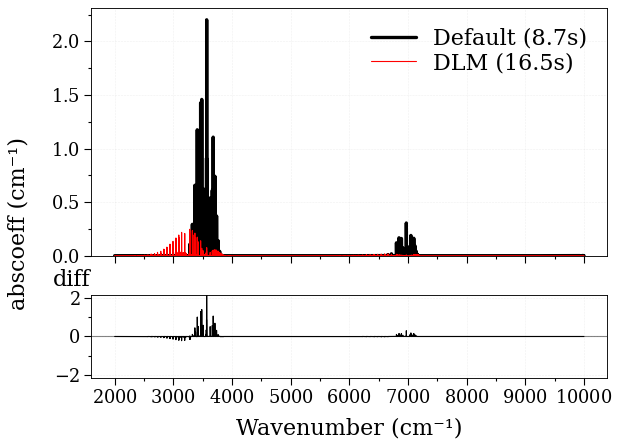

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9d96a804d0>])

In [21]:
plot_diff(s_none, s_dlm_opt, 'abscoeff')